# HOUSE PRICE PREDICTION DATASET


IMPORTING LIBRARIES AND DATASET

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)


In [ ]:
import joblib
# Assuming 'model' is your trained regression model
joblib.dump(model, 'house_model.pkl')
# Also save your scaler or encoder if you used them
# joblib.dump(scaler, 'scaler.pkl')

In [ ]:
df1=pd.read_csv("House_Price_Prediction.csv")
df1.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


DESCRIBING AND CLEANING THE DATASET

In [ ]:
df1.shape


(13320, 9)

In [ ]:
df1.groupby('area_type')['area_type'].agg('count') # count of each area type in the dataset

,area_type
area_type,
Built-up Area,2418
Carpet Area,87
Plot Area,2025
Super built-up Area,8790


In [ ]:
df2=df1.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns') # dropping unnecessary columns
df2.head(5) # checking the data after dropping unnecessary columns

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [ ]:
#data cleaning
df2.isnull().sum() # checking for null values in the dataset


,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [ ]:
df3=df2.dropna() # dropping null values
df3.isnull().sum() # checking for null values in the dataset after dropping null values


,0
location,0
size,0
total_sqft,0
bath,0
price,0


ANALYZING AND PREPARING THE DATASET

In [ ]:
df2['size'].unique() # checking the unique values in the size column

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0])) # extracting the number of bhk from the size column
df3.head(5) # checking the data after extracting the number of bhk from the size column

/tmp/ipython-input-26-2863671544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0])) # extracting the number of bhk from the size column


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [ ]:
df3['bhk'].unique() # checking unique values in the bhk column

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [ ]:
df3[df3.bhk>20] # checking the data where bhk is greater than 20

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [ ]:
df3.total_sqft.unique() # checking the unique values in the total_sqft column


array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def is_float(x): # function to check if a value is float or not
    try:
        float(x)
    except:
        return False
    return True

In [ ]:
df3[~df3['total_sqft'].apply(is_float)].head(10) # checking the data where total_sqft is not a float value

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [ ]:
def convert_sqft_to_num(x): # function to convert the total_sqft column values to float
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None


In [ ]:
convert_sqft_to_num('2166') # checking the function to convert the total_sqft column values to float

2166.0

In [ ]:
convert_sqft_to_num('2100-2850') # checking the function to convert the total_sqft column values to float

2475.0

In [ ]:
convert_sqft_to_num('34.465q. Meter') # checking the function to convert the total_sqft column values to float

In [ ]:
df4=df3.copy() # creating a copy of the dataframe
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num) # applying the function to convert the total_sqft column values to float
df4.head(5) # checking the data after converting the total_sqft column values to float

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [ ]:
df4.loc[30] # checking the data at index 30

,30
location,Yelahanka
size,4 BHK
total_sqft,2475.0
bath,4.0
price,186.0
bhk,4


In [ ]:
df4.head(5) # checking the data after converting the total_sqft column values to float

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [ ]:
df5=df4.copy() # creating a copy of the dataframe
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft'] # calculating the price per sqft
df5.head() # checking the data after calculating the price per sqft



,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [ ]:
df5.location.unique() # checking the unique values in the location column
len(df5.location.unique()) # checking the number of unique values in the location column



1304

In [ ]:
df5.location=df5.location.apply(lambda x: x.strip()) # removing the leading and trailing spaces in the location column
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False) # grouping the location column and counting the number of occurrences of each location
location_stats

,location
location,
Whitefield,535
Sarjapur Road,392
Electronic City,304
Kanakpura Road,266
Thanisandra,236
...,...
poornaprajna layout,1
pavitra paradise,1
near Ramanashree California resort,1


In [ ]:
len(location_stats[location_stats<=10]) # checking the number of locations with more than 10 occurrences

1052

In [ ]:
location_stats_less_than_10=location_stats[location_stats<=10] # creating a new dataframe with locations with less than 10 occurrences
location_stats_less_than_10 # checking the new dataframe with locations with less than 10 occurrences

,location
location,
Kalkere,10
Sadashiva Nagar,10
BTM 1st Stage,10
Basapura,10
Gunjur Palya,10
...,...
poornaprajna layout,1
pavitra paradise,1
near Ramanashree California resort,1


In [ ]:
len(df5.location.unique()) # checking the number of unique values in the location column

1293

In [ ]:

df5.location=df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)# removing the leading and trailing spaces in the location column
len(df5.location.unique()) # checking the number of unique values in the location column after removing the locations with less than 10 occurrences

242

In [ ]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [ ]:
#outlier removal
df5[df5.total_sqft/df5.bhk<300].head() # checking the data where total_sqft/bhk is less than 300

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [ ]:
df5.shape

(13246, 7)

In [ ]:
df6=df5[~(df5.total_sqft/df5.bhk<300)] # removing the outliers from the dataframe
df6.shape # checking the shape of the dataframe after removing the outliers

(12502, 7)

In [ ]:
df6.price_per_sqft.describe() # checking the description of the price_per_sqft column


,price_per_sqft
count,12456.000000
mean,6308.502826
std,4168.127339
min,267.829813
25%,4210.526316
50%,5294.117647
75%,6916.666667
max,176470.588235


REMOVING OUTLIERS

In [ ]:
def remove_pps_outliers(df): # function to remove the outliers from the price_per_sqft column
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft) # calculating the mean of the price_per_sqft column
        st=np.std(subdf.price_per_sqft) # calculating the standard deviation of the price_per_sqft column
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))] # removing the outliers from the price_per_sqft column
        df_out=pd.concat([df_out, reduced_df], ignore_index=True) # concatenating the dataframes
    return df_out
df7=remove_pps_outliers(df6) # applying the function to remove the outliers from the price_per_sqft columnd
df7.shape

(10241, 7)

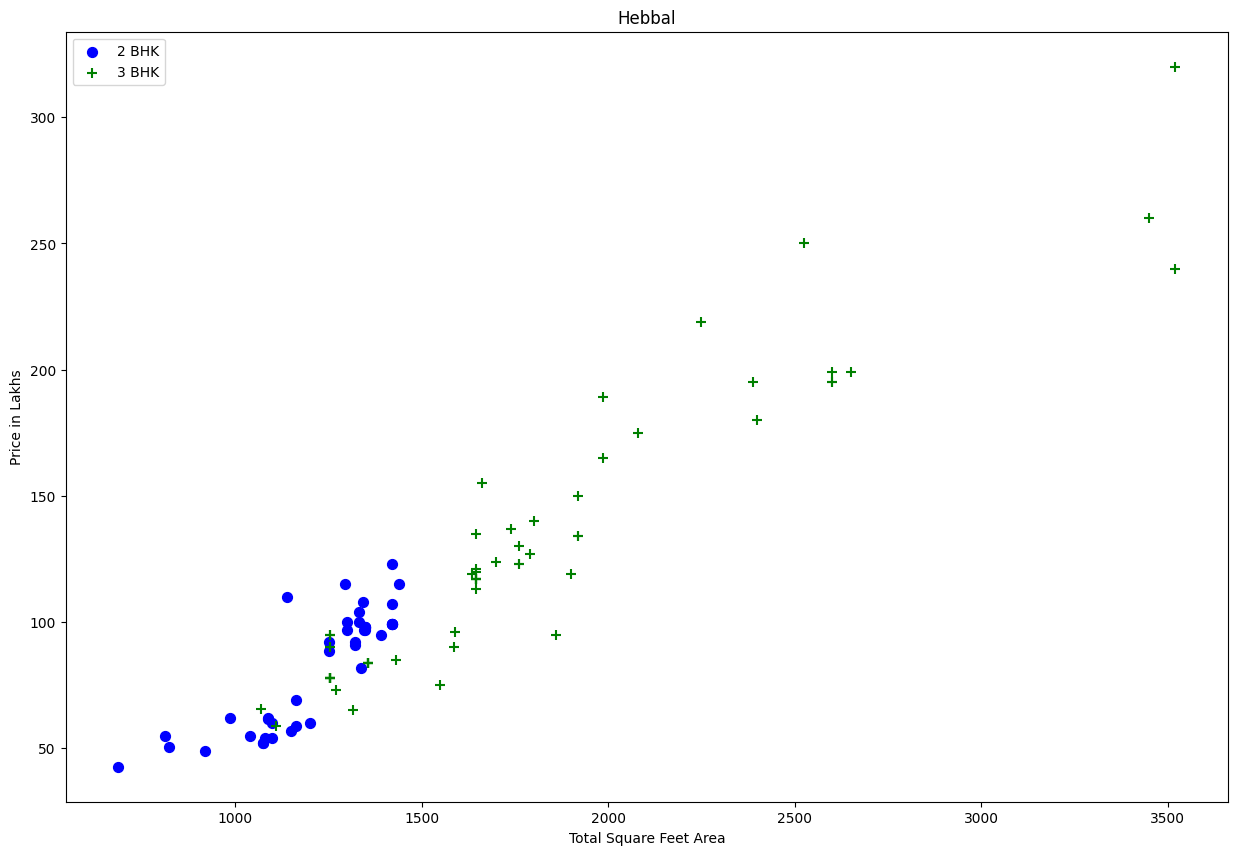

In [ ]:
def plot_scatter_chart(df, location): # function to plot the scatter chart
    bhk2=df[(df.location==location) & (df.bhk==2)] # creating a new dataframe with the location and bhk=2
    bhk3=df[(df.location==location) & (df.bhk==3)]# creating a new dataframe with the location and bhk=3
    matplotlib.rcParams['figure.figsize'] = (15,10  ) # setting the figure size
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50) # plotting the scatter chart for bhk=2
    plt.scatter(bhk3.total_sqft, bhk3.price, color='green',marker='+', label='3 BHK', s=50) # plotting the scatter chart for bhk=3
    plt.xlabel("Total Square Feet Area") # setting the x-axis label
    plt.ylabel("Price in Lakhs") # setting the y-axis label
    plt.title(location) # setting the title of the chart
    plt.legend() # adding the legend to the chart

plot_scatter_chart(df7, "Hebbal") # plotting the scatter chart for Rajaji Nagar


In [ ]:
#here the two room bedroom house is more expensive than the three room bedroom house, so we need to remove this outlier
def remove_bhk_outliers(df): # function to remove the outliers from the bhk column
    exclude_indices=np.array([]) # creating an empty array
    for location, location_df in df.groupby('location'): # grouping the dataframe by location
        bhk_stats={} # creating an empty dictionary
        for bhk, bhk_df in location_df.groupby('bhk'): # grouping the dataframe by bhk
            bhk_stats[bhk]={
                'mean': np.mean(bhk_df.price_per_sqft), # calculating the mean of the price_per_sqft column
                'std': np.std(bhk_df.price_per_sqft), # calculating the standard deviation of the price_per_sqft column
                'count': bhk_df.shape[0] # calculating the number of rows in the dataframe
            }
        for bhk, bhk_df in location_df.groupby('bhk'): # grouping the dataframe by bhk
            stats=bhk_stats.get(bhk-1) # getting the stats of the previous bhk value
            if stats and stats['count']>5: # checking if the stats is not empty and the count is greater than 5
                exclude_indices=np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values) # appending the indices to the exclude_indices array
    return df.drop(exclude_indices, axis='index') # dropping the indices from the dataframe
df8=remove_bhk_outliers(df7) # applying the function to remove the outliers from the bhk column
df8.shape # checking the shape of the dataframe after removing the outliers

(7329, 7)

VISUALIZING THE DATA

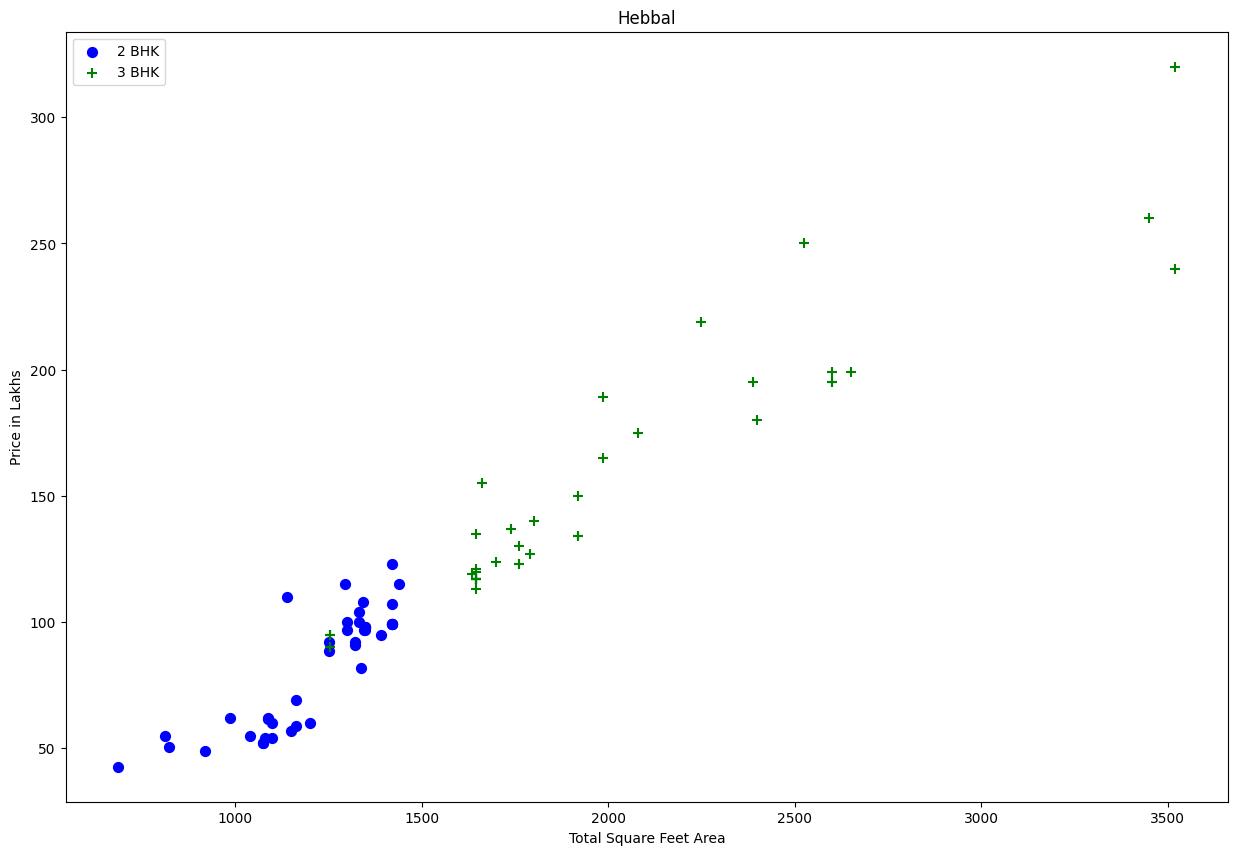

In [ ]:
plot_scatter_chart(df8, "Hebbal") # plotting the scatter chart for Rajaji Nagar after removing the outliers

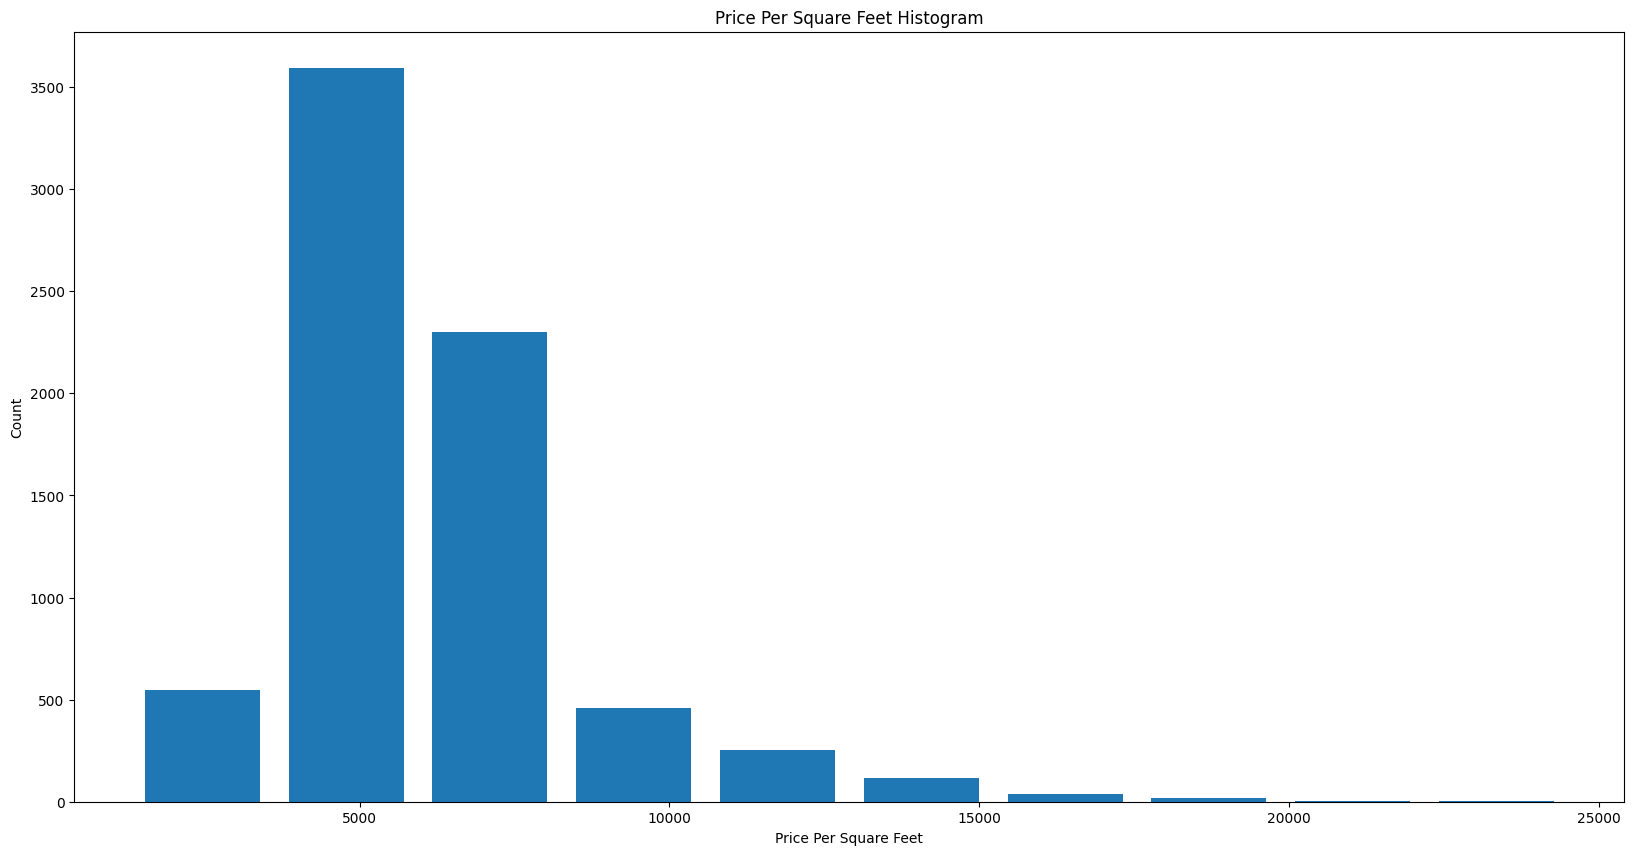

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10  ) # setting the figure size
plt.hist(df8.price_per_sqft, rwidth=0.8) # plotting the histogram for the price_per_sqft column
plt.xlabel("Price Per Square Feet") # setting the x-axis label
plt.ylabel("Count") # setting the y-axis label
plt.title("Price Per Square Feet Histogram") # setting the title of the chart
plt.show() # showing the chart

In [ ]:
df8.bath.unique() # checking the unique values in the bathroom column

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [ ]:
df8[df8.bath>10] # checking the data where bathroom is greater than 10

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


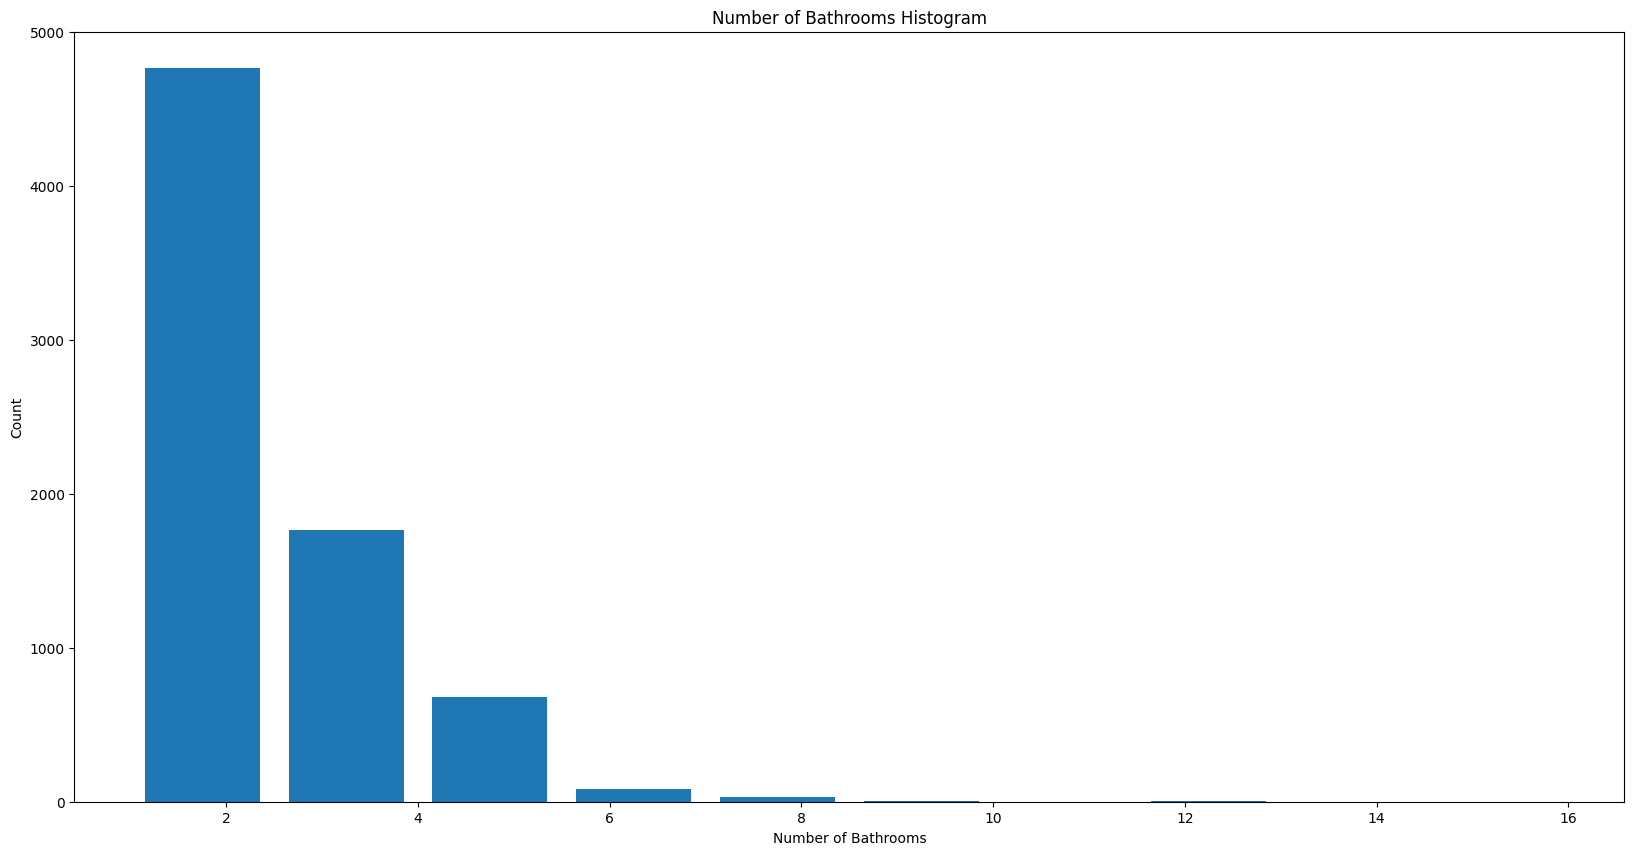

In [ ]:
plt.hist(df8.bath, rwidth=0.8) # plotting the histogram for the bathroom column
plt.xlabel("Number of Bathrooms") # setting the x-axis label
plt.ylabel("Count") # setting the y-axis label
plt.title("Number of Bathrooms Histogram") # setting the title of the chart
plt.show() # showing the chart


In [ ]:
df8[df8.bath>df8.bhk+2] # checking the data where bathroom is greater than 10



,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [ ]:
df9=df8[df8.bath<df8.bhk+2] # removing the outliers from the bathroom column
df9.shape # checking the shape of the dataframe after removing the outliers


(7251, 7)

In [ ]:
#drop the unnecessary columns
df10=df9.drop(['size', 'price_per_sqft'], axis='columns') # dropping the unnecessary columns
df10.head(5) # checking the data after dropping the unnecessary columns

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [ ]:
dummies=pd.get_dummies(df10.location) # creating dummy variables for the location column
dummies.head(5) # checking the dummy variables for the location column


,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df11=pd.concat([df10, dummies.drop('other', axis='columns')], axis='columns') # concatenating the dummy variables with the datafr
df11.head(3) # checking the data after concatenating the dummy variables with the dataframe

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df12=df11.drop('location', axis='columns') # dropping the location column
df12.head(2) # checking the data after dropping the location column

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df12.shape

(7251, 245)

In [ ]:
X=df12.drop('price', axis='columns') # creating the feature set by dropping the price column
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
y=df12.price
y.head()


,price
0,428.0
1,194.0
2,235.0
3,130.0
4,148.0


MACHINE LEARNING

In [ ]:
from sklearn.model_selection import train_test_split # importing the train_test_split function from sklearn
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=10) # splitting the data into training and testing sets




In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8452277697874329

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, ShuffleSplit
import pandas as pd

def linear_regression_gridsearch(X, y):
    model = LinearRegression()
    params = {
        'fit_intercept': [True, False],
        'positive': [True, False]
    }
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    gs = GridSearchCV(model, params, cv=cv)
    gs.fit(X, y)

    return {
        'model': 'Linear Regression',
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    }


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, ShuffleSplit
import pandas as pd
import numpy as np # Import numpy

def linear_regression_gridsearch(X, y):
    model = LinearRegression()
    params = {
        'fit_intercept': [True, False],
        'positive': [True, False]
    }
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    gs = GridSearchCV(model, params, cv=cv)
    gs.fit(X, y)

    return {
        'model': 'Linear Regression',
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    }

results = [
    linear_regression_gridsearch(X, y)
]

df_results = pd.DataFrame(results)
print(df_results)

               model  best_score                                  best_params
0  Linear Regression    0.819001  {'fit_intercept': False, 'positive': False}


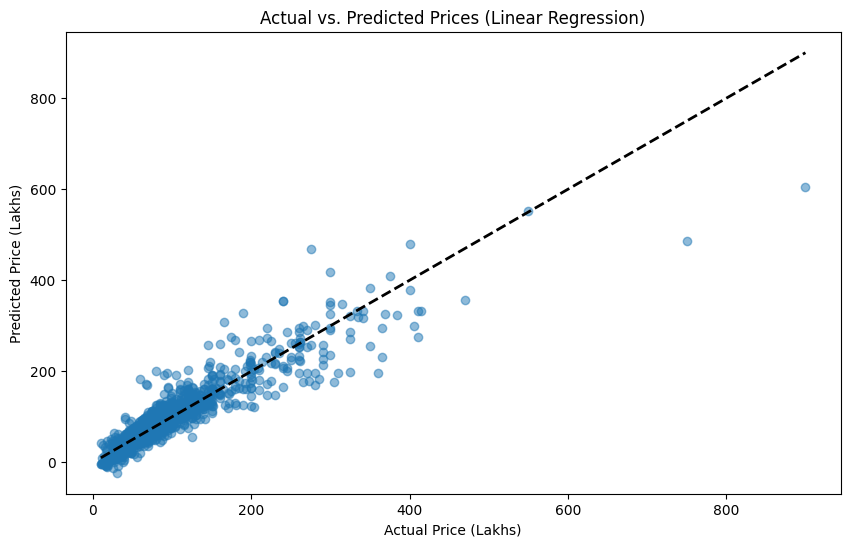

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_clf.predict(X_test)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Add a diagonal line for perfect prediction
plt.xlabel("Actual Price (Lakhs)")
plt.ylabel("Predicted Price (Lakhs)")
plt.title("Actual vs. Predicted Prices (Linear Regression)")
plt.show()

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)
print("Ridge Regression R²:", r2_score(y_test, y_pred_ridge))

# Train a Lasso Regression model
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)
print("Lasso Regression R²:", r2_score(y_test, y_pred_lasso))

Ridge Regression R²: 0.843989744909689
Lasso Regression R²: 0.7237775279429011


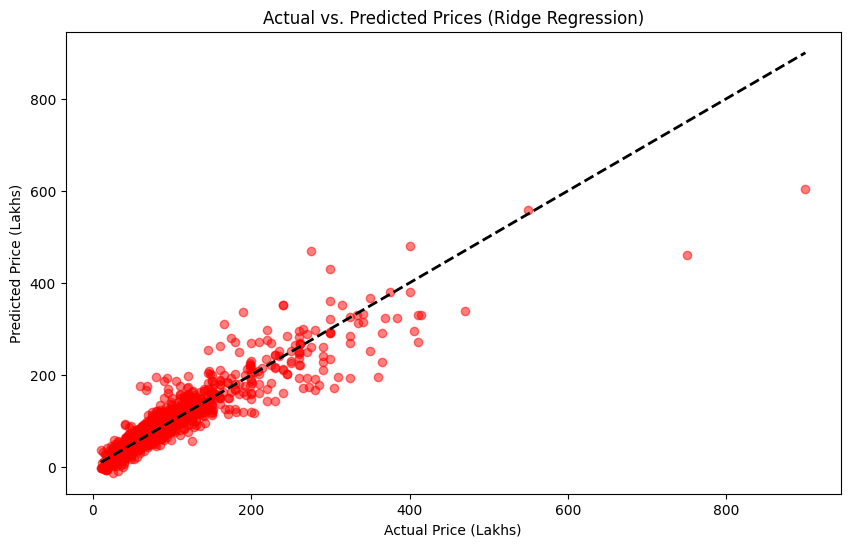

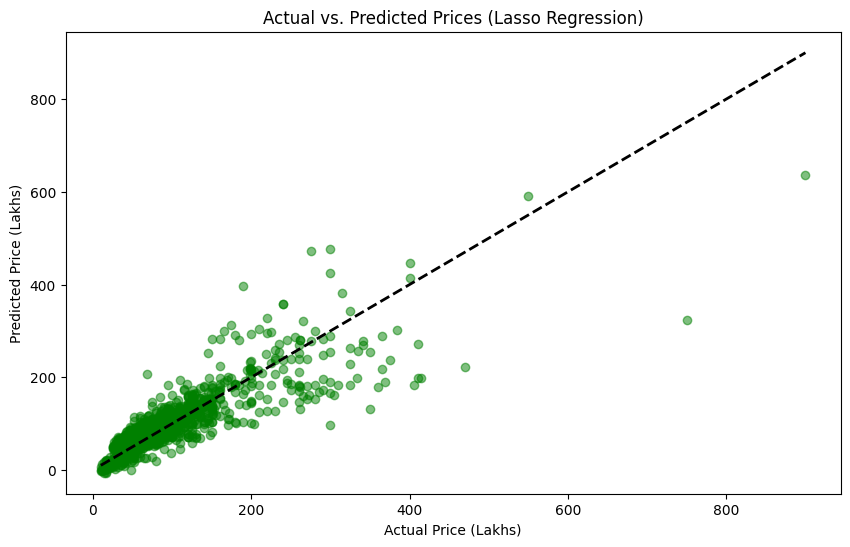

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso

y_pred_ridge = ridge_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)

# Plot actual vs predicted prices for Ridge Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Price (Lakhs)")
plt.ylabel("Predicted Price (Lakhs)")
plt.title("Actual vs. Predicted Prices (Ridge Regression)")
plt.show()

# Plot actual vs predicted prices for Lasso Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Price (Lakhs)")
plt.ylabel("Predicted Price (Lakhs)")
plt.title("Actual vs. Predicted Prices (Lasso Regression)")
plt.show()

Decision Tree R²: 0.7275299287251968


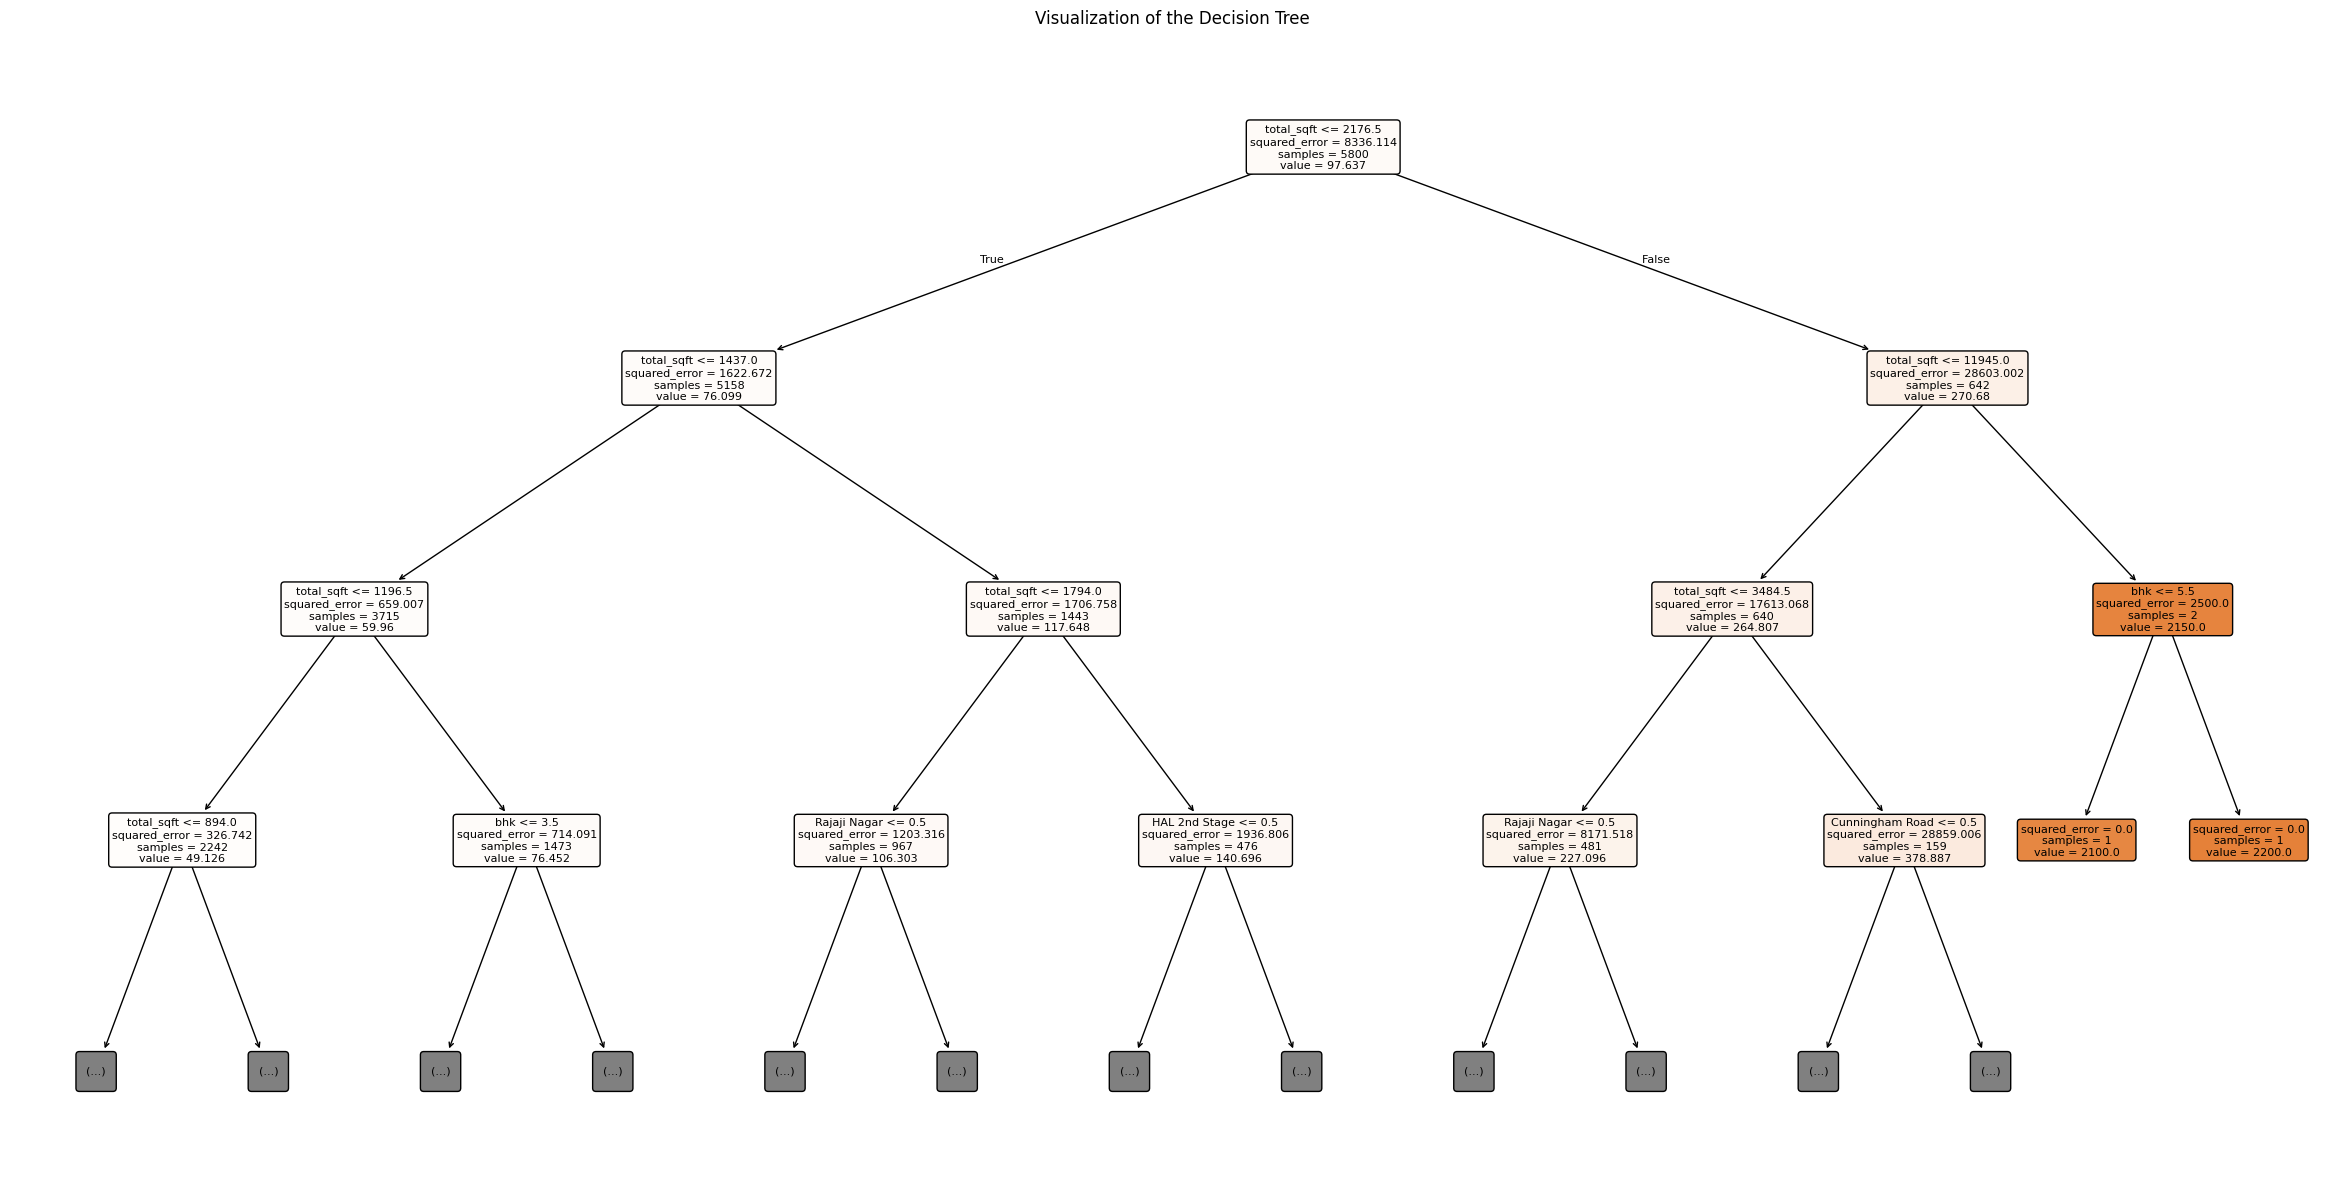

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Train a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_regressor.predict(X_test)
print("Decision Tree R²:", dt_regressor.score(X_test, y_test))


# Visualize the Decision Tree
plt.figure(figsize=(30, 15))
plot_tree(
    dt_regressor,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=8,
    max_depth=3
)
plt.title("Visualization of the Decision Tree")
plt.show()


Random Forest R²: 0.7953582626707112


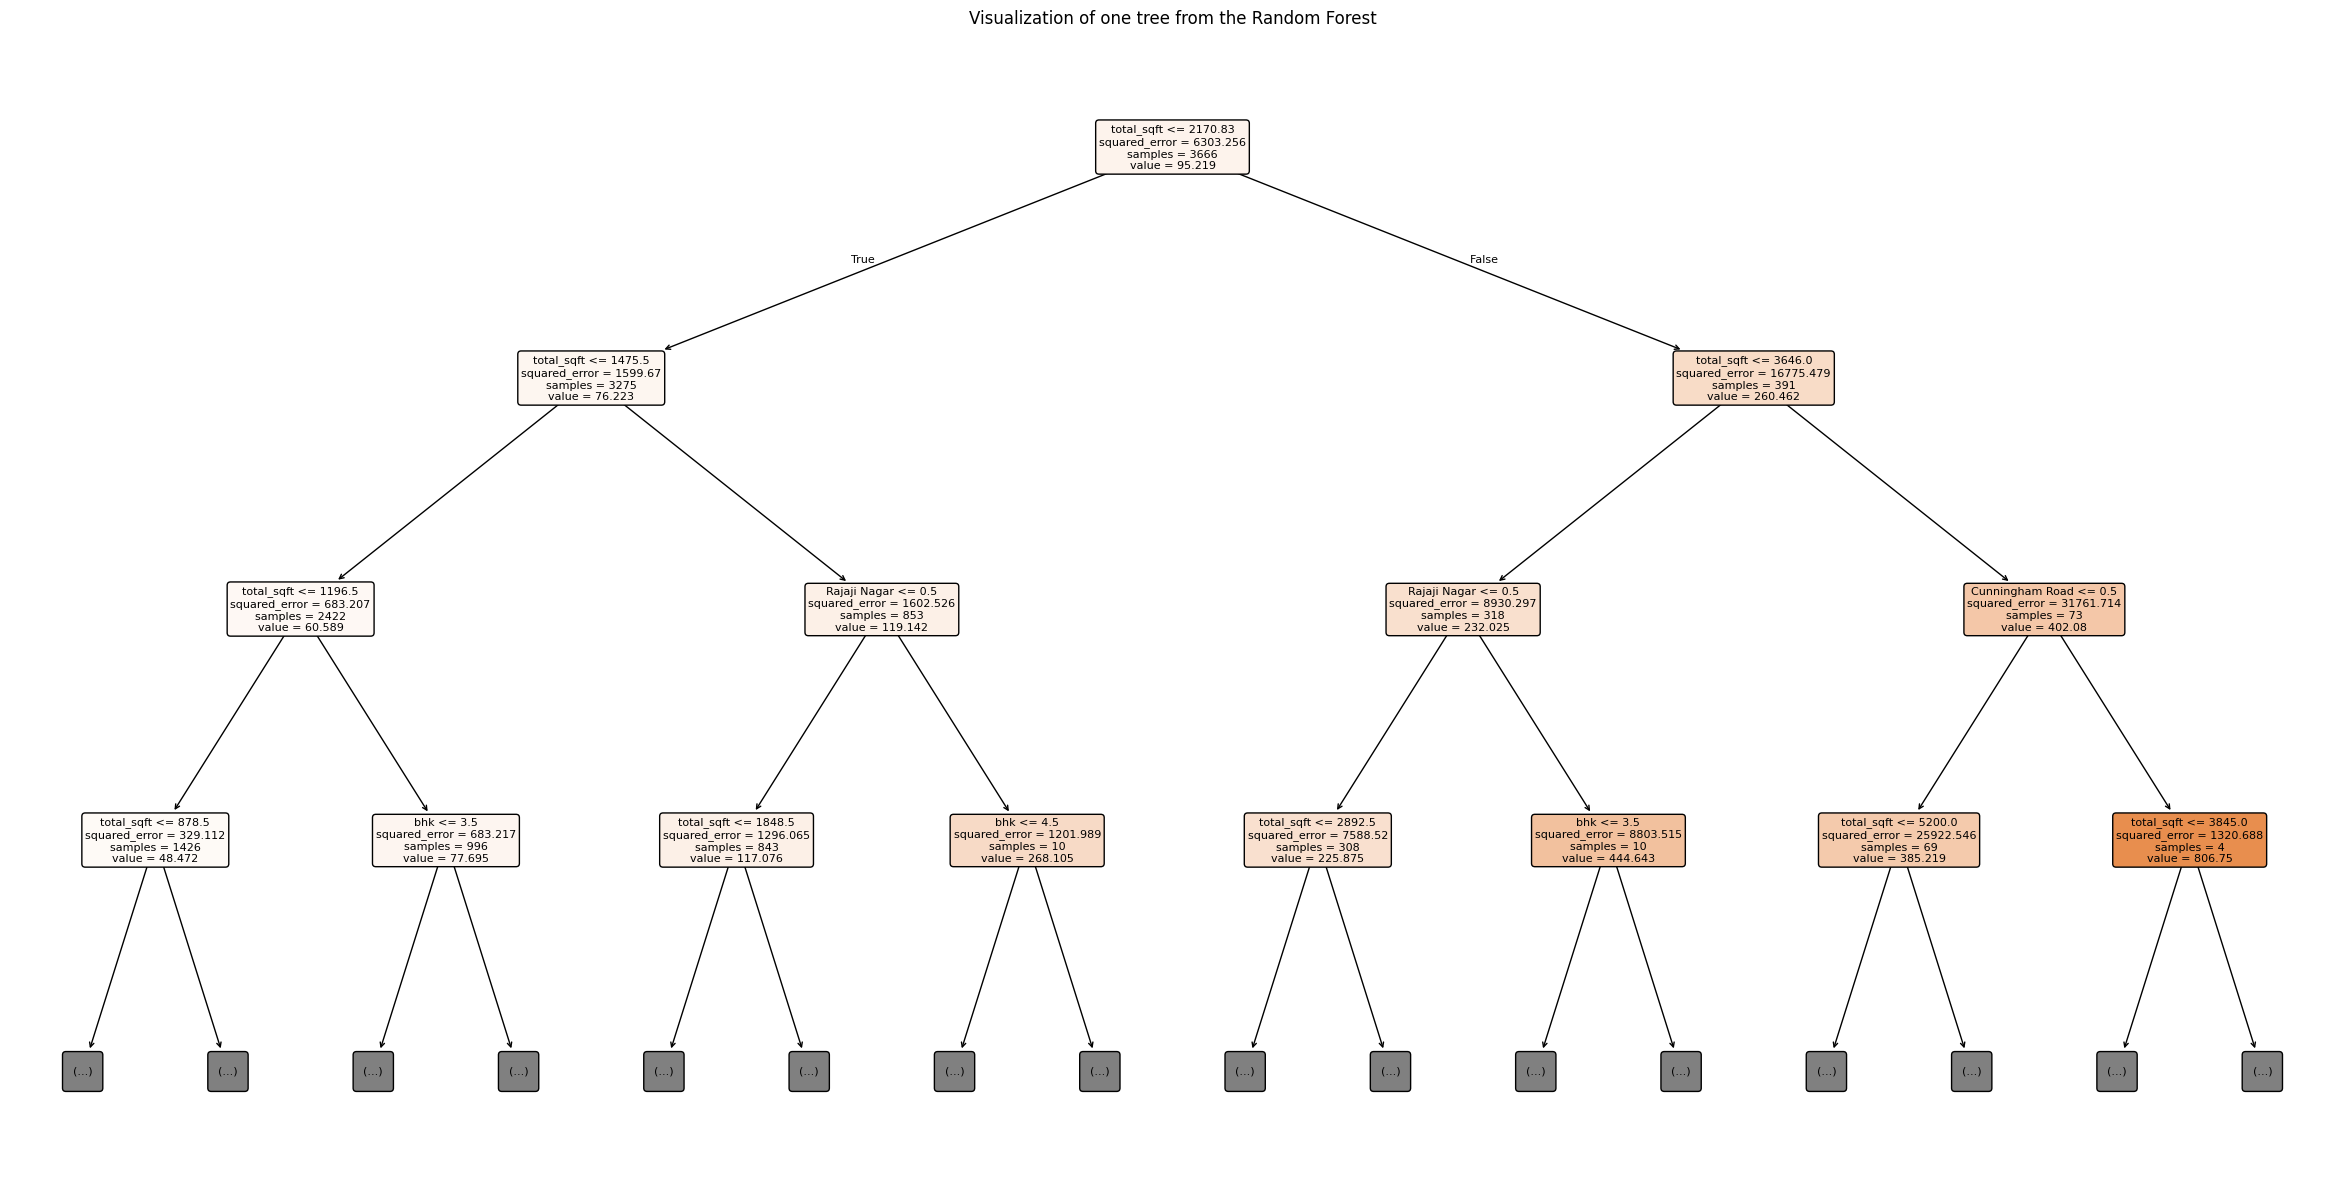

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree # Import plot_tree for visualization

# Train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42) # You can adjust n_estimators
rf_regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_regressor.predict(X_test)
print("Random Forest R²:", rf_regressor.score(X_test, y_test))

plt.figure(figsize=(30, 15))
plot_tree(
    rf_regressor.estimators_[0],
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=8,
    max_depth=3
)
plt.title("Visualization of one tree from the Random Forest")
plt.show()


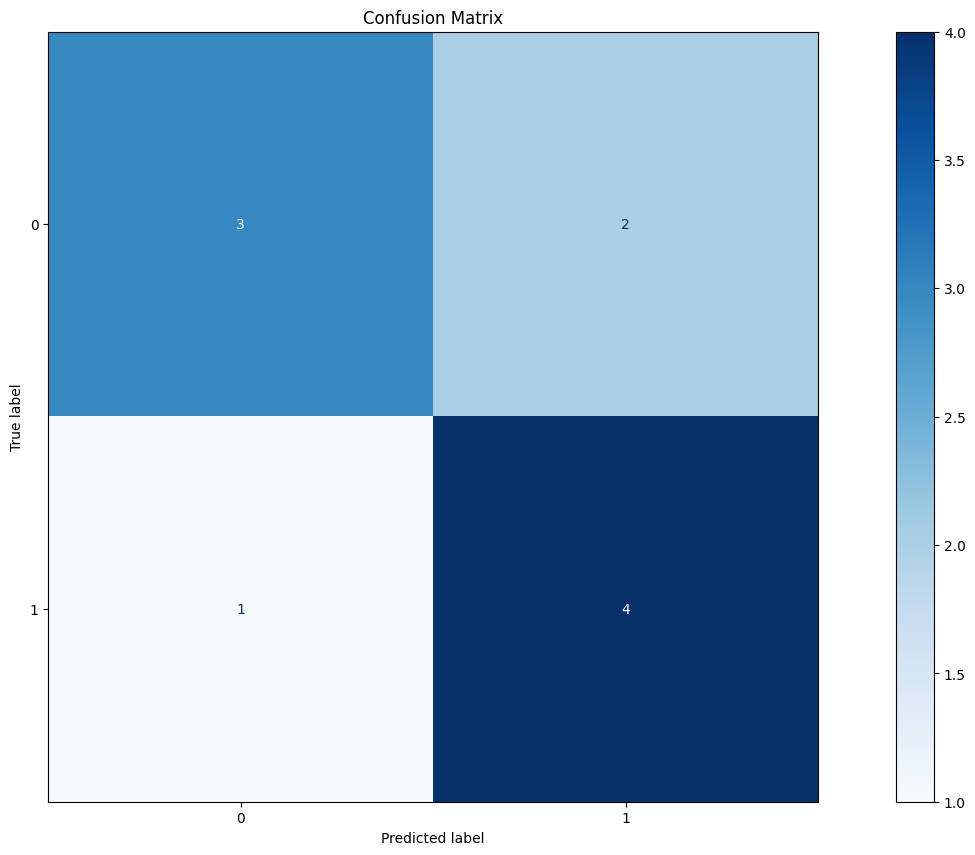

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true_classification = [0, 1, 0, 1, 1, 0, 0, 1, 0, 1]
y_pred_classification = [0, 1, 1, 1, 0, 0, 0, 1, 1, 1]

# Calculate the confusion matrix
cm = confusion_matrix(y_true_classification, y_pred_classification)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1]) # Replace with your class labels

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
